In [1]:
import pandas_datareader as pdr
key="e0874854e684a3ddffe2fff66e9f038e76fb393b"

In [2]:
df = pdr.get_data_tiingo('SSNLF', api_key=key)

In [3]:
df.to_csv('SSNLF.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('SSNLF.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,SSNLF,2016-05-03 00:00:00+00:00,1050.0,1050.0,1050.0,1050.0,200,20.240912,20.240912,20.240912,20.240912,10000,0.0,1.0
1,SSNLF,2016-05-04 00:00:00+00:00,1050.0,1050.0,1050.0,1050.0,0,20.240912,20.240912,20.240912,20.240912,0,0.0,1.0
2,SSNLF,2016-05-05 00:00:00+00:00,1050.0,1050.0,1050.0,1050.0,0,20.240912,20.240912,20.240912,20.240912,0,0.0,1.0
3,SSNLF,2016-05-06 00:00:00+00:00,1050.0,1050.0,1050.0,1050.0,0,20.240912,20.240912,20.240912,20.240912,0,0.0,1.0
4,SSNLF,2016-05-09 00:00:00+00:00,1050.0,1050.0,1050.0,1050.0,70,20.240912,20.240912,20.240912,20.240912,3500,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1002,SSNLF,2021-04-26 00:00:00+00:00,44.2,44.2,44.2,44.2,0,44.2,44.2,44.2,44.2,0,0.0,1.0
1003,SSNLF,2021-04-27 00:00:00+00:00,44.2,44.2,44.2,44.2,0,44.2,44.2,44.2,44.2,0,0.0,1.0
1004,SSNLF,2021-04-28 00:00:00+00:00,44.2,44.2,44.2,44.2,0,44.2,44.2,44.2,44.2,0,0.0,1.0
1005,SSNLF,2021-04-29 00:00:00+00:00,44.2,44.2,44.2,44.2,0,44.2,44.2,44.2,44.2,0,0.0,1.0
1006,SSNLF,2021-04-30 00:00:00+00:00,44.2,44.2,44.2,44.2,200,44.2,44.2,44.2,44.2,200,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       1050.0
1       1050.0
2       1050.0
3       1050.0
4       1050.0
         ...  
1002      44.2
1003      44.2
1004      44.2
1005      44.2
1006      44.2
Name: close, Length: 1007, dtype: float64

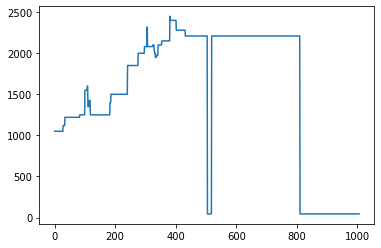

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
df1

0       1050.0
1       1050.0
2       1050.0
3       1050.0
4       1050.0
         ...  
1002      44.2
1003      44.2
1004      44.2
1005      44.2
1006      44.2
Name: close, Length: 1007, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.41807299]
 [0.41807299]
 [0.41807299]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(654, 353)

In [17]:
train_data

array([[0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.41807299],
       [0.44716934],
       [0.44716934],
       [0.44716934],
       [0.44716934],
       [0.44716934],
       [0.44716934],
       [0.48873556],
       [0.48873556],
       [0.48873556],
       [0.48873556],
       [0.48873556],
       [0.48873556],
       [0.48873556],
       [0.48873556],
       [0.48873556],
       [0.48873556],
       [0.48873556],
       [0.48873556],
       [0.48873556],
       [0.488

In [18]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]  ###i=0,1,2,3,-------,99
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3, and Y=t+4
time_step = 100 
X_train, Y_train = create_dataset(train_data, time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [20]:
print(X_train.shape),print(Y_train.shape)

(553, 100)
(553,)


(None, None)

In [21]:
print(X_test.shape),print(Y_test.shape)

(252, 100)
(252,)


(None, None)

In [22]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [23]:
### Create the Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 9s 414ms/step - loss: 0.4207 - val_loss: 0.1190
Epoch 2/100
9/9 [==============================] - 2s 199ms/step - loss: 0.0587 - val_loss: 0.0425
Epoch 3/100
9/9 [==============================] - 2s 194ms/step - loss: 0.0357 - val_loss: 0.0724
Epoch 4/100
9/9 [==============================] - 2s 194ms/step - loss: 0.0215 - val_loss: 0.0533
Epoch 5/100
9/9 [==============================] - 2s 189ms/step - loss: 0.0272 - val_loss: 0.0596
Epoch 6/100
9/9 [==============================] - 2s 198ms/step - loss: 0.0192 - val_loss: 0.0553
Epoch 7/100
9/9 [==============================] - 2s 197ms/step - loss: 0.0204 - val_loss: 0.0535
Epoch 8/100
9/9 [==============================] - 2s 197ms/step - loss: 0.0180 - val_loss: 0.0506
Epoch 9/100
9/9 [==============================] - 2s 191ms/step - loss: 0.0166 - val_loss: 0.0480
Epoch 10/100
9/9 [==============================] - 2s 194ms/step - loss: 0.0210 - val_loss: 0.0455
Epoch 11/

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.4.1'

In [29]:
### Prediction and check performence metrices
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
###Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE  performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

1932.0528231797214

In [32]:
###Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

1115.2675764203864

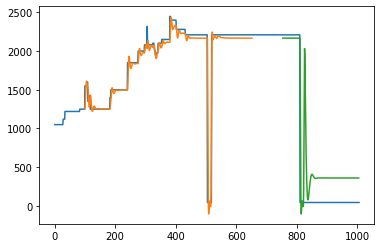

In [34]:
###Plotting
# Shift train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1: len(df1)-1, :]=test_predict
#plot baseline and predicitons 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

353

In [36]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 12)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [44]:
### demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=12
i=0
while(i<30):
  if(len(temp_input)>12):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    ###print(x_input)
    yhat=model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
      x_input=x_input.reshape((1,n_steps,1))
      yhat=model.predict(x_input,verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i=i+1

print(lst_output)

0 day input [0.23094861 0.23101713 0.2310553  0.23106736 0.23105796 0.23103143
 0.23099199 0.23094347 0.23088941 0.23083273 0.23077598 0.23072128]
0 day output [[0.23067015]]
1 day input [0.23101713 0.2310553  0.23106736 0.23105796 0.23103143 0.23099199
 0.23094347 0.23088941 0.23083273 0.23077598 0.23072128 0.23067015]
1 day output [[0.2306238]]
2 day input [0.2310553  0.23106736 0.23105796 0.23103143 0.23099199 0.23094347
 0.23088941 0.23083273 0.23077598 0.23072128 0.23067015 0.2306238 ]
2 day output [[0.23058303]]
3 day input [0.23106736 0.23105796 0.23103143 0.23099199 0.23094347 0.23088941
 0.23083273 0.23077598 0.23072128 0.23067015 0.2306238  0.23058303]
3 day output [[0.23054817]]
4 day input [0.23105796 0.23103143 0.23099199 0.23094347 0.23088941 0.23083273
 0.23077598 0.23072128 0.23067015 0.2306238  0.23058303 0.23054817]
4 day output [[0.23051943]]
5 day input [0.23103143 0.23099199 0.23094347 0.23088941 0.23083273 0.23077598
 0.23072128 0.23067015 0.2306238  0.23058303 0.

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
import matplotlib.pyplot as plt


In [47]:
len(df1)

1007

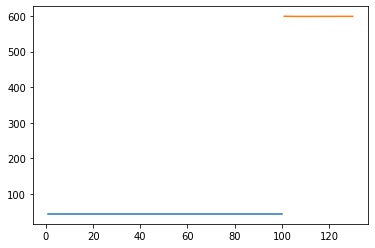

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[907:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

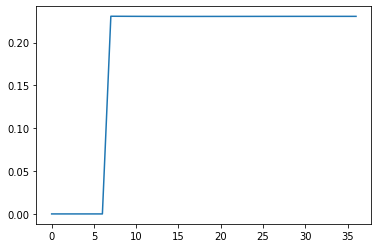

In [49]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [50]:
df3=scaler.inverse_transform(df3).tolist()

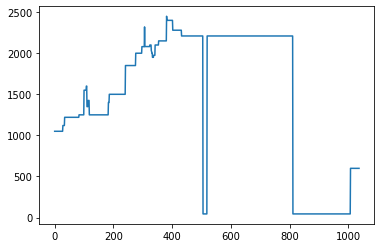

In [51]:
plt.plot(df3)